## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
# To ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
df = pd.read_csv('../data/crop_recommendation.csv')

## Describe Data

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()
# No null values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
df['label'].value_counts()

grapes         100
papaya         100
chickpea       100
rice           100
maize          100
apple          100
orange         100
pomegranate    100
banana         100
coffee         100
lentil         100
coconut        100
mungbean       100
mango          100
cotton         100
pigeonpeas     100
jute           100
watermelon     100
muskmelon      100
blackgram      100
mothbeans      100
kidneybeans    100
Name: label, dtype: int64

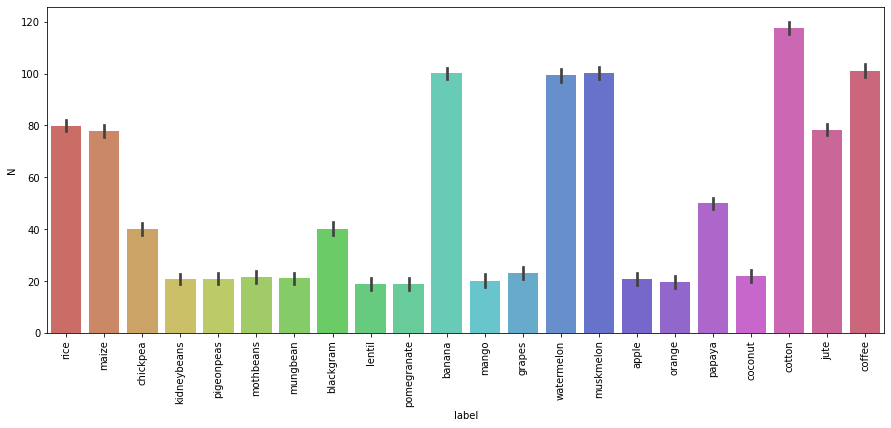

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

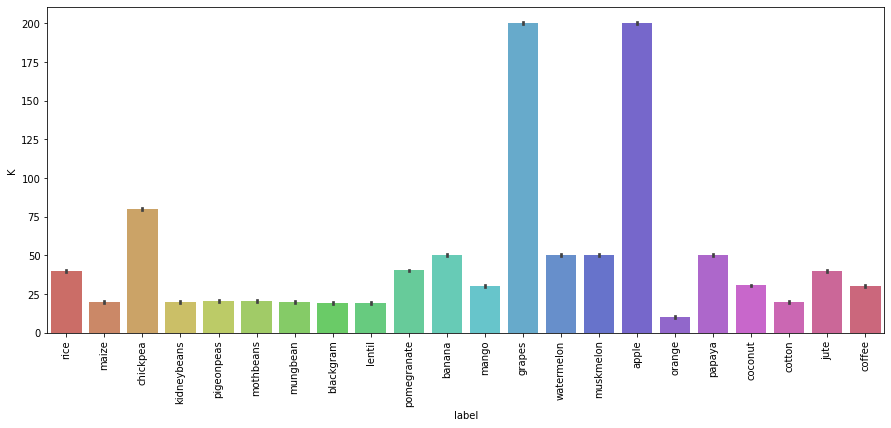

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(y='K',x='label',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

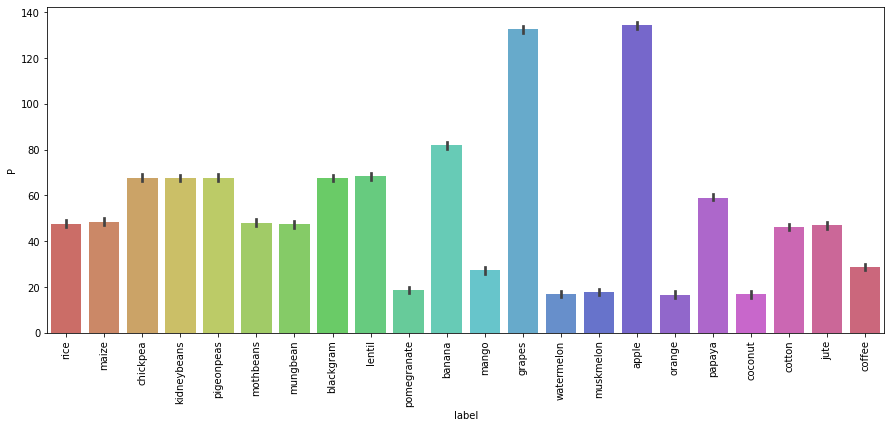

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [20]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

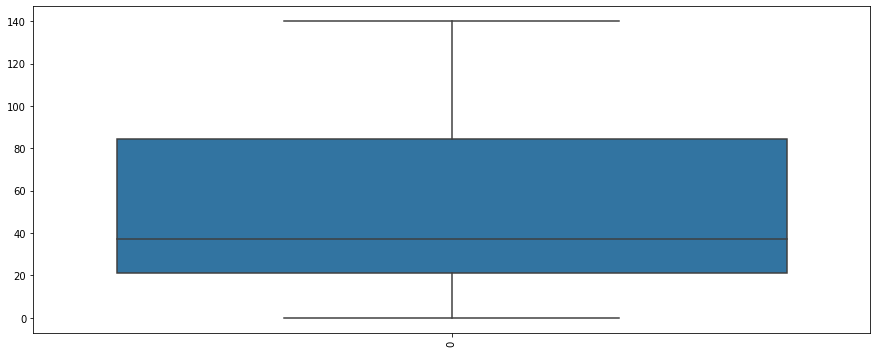

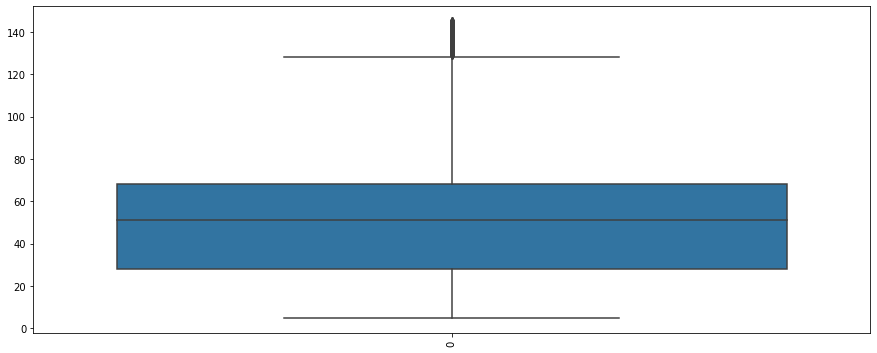

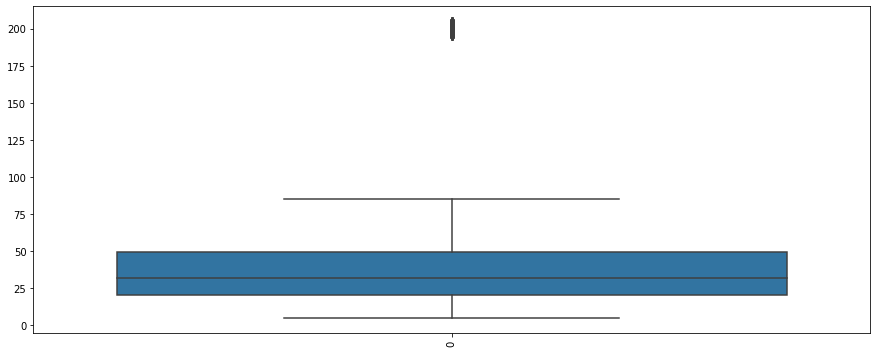

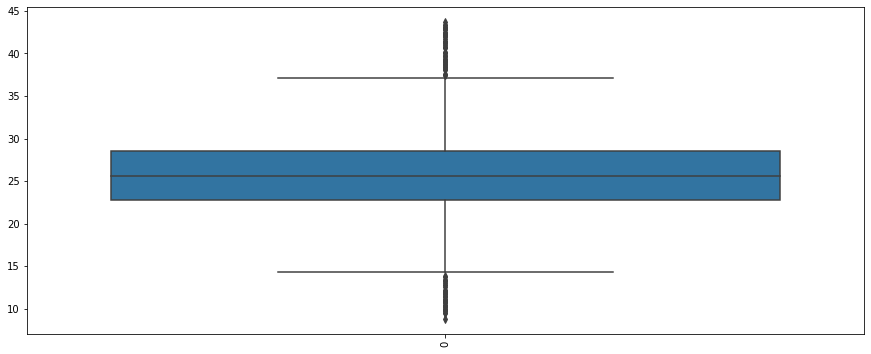

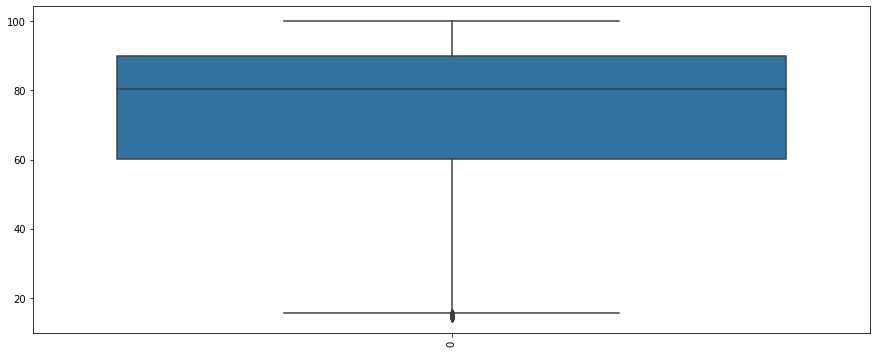

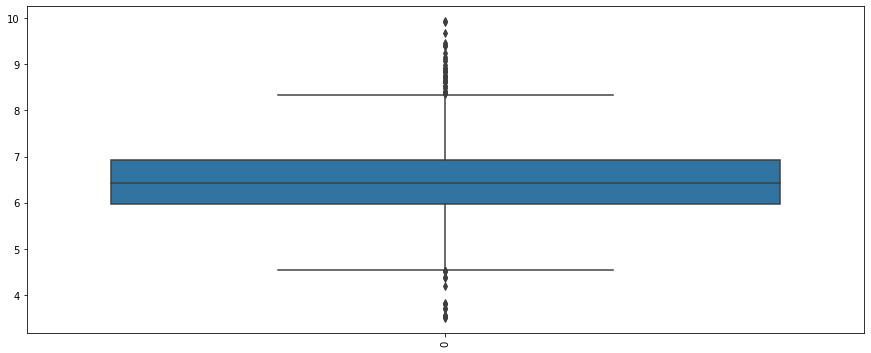

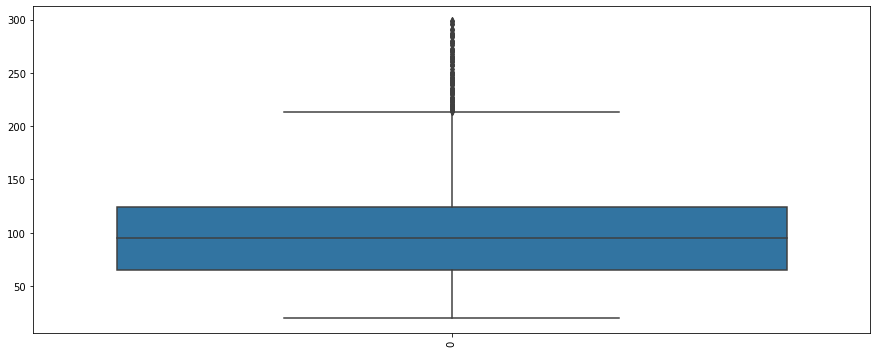

In [21]:
data1=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data1[i])
    plt.xticks(rotation=90)
    plt.show()

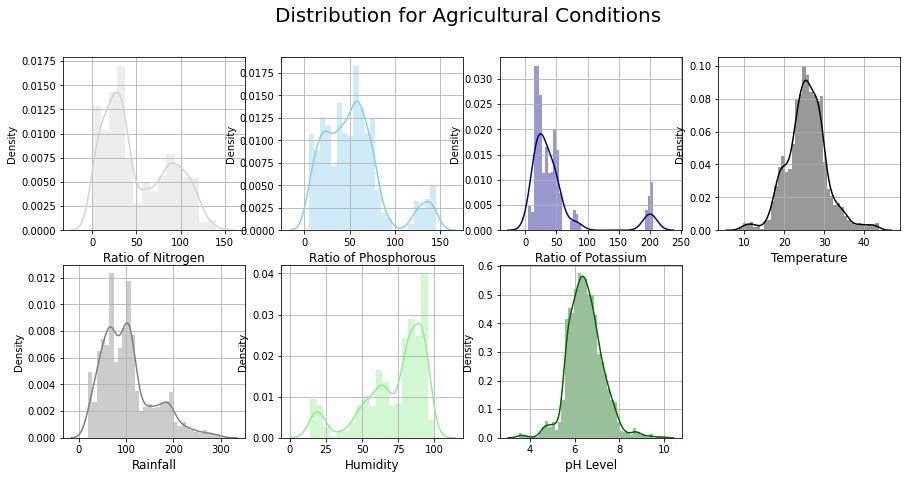

In [22]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(df['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(df['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(df['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(df['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(df['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(df['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(df['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [23]:
fig1= px.bar(df,x='label',y='N')
fig1.show()

In [24]:
fig1= px.bar(df,x='label',y='P')
fig1.show()

In [25]:
fig1= px.bar(df,x='label',y='K')
fig1.show()

<AxesSubplot:>

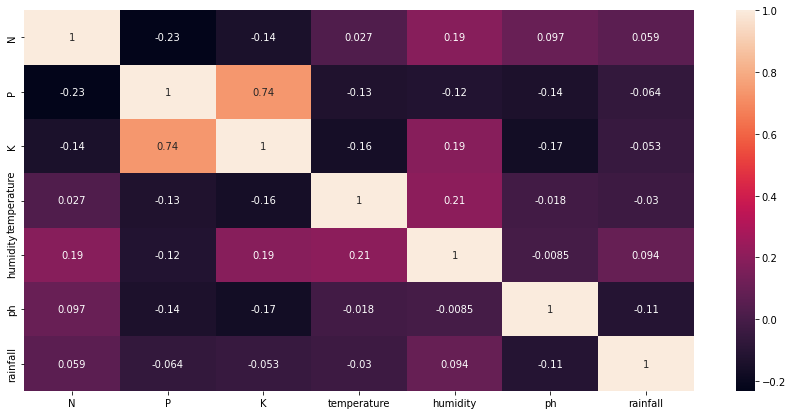

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['label'],
    y=df['N'],
    name='Nitrogen',
    marker_color='red'
))
fig.add_trace(go.Bar(
    x=df['label'],
    y=df['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=df['label'],
    y=df['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [28]:
crop_scatter=df[(df['label']=='rice') |
                (df['label']=='jute') |
                (df['label']=='cotton') |
                (df['label']=='maize') |
                (df['label']=='lentil') ]
fig=px.scatter(crop_scatter,x="temperature",y="humidity",color="label",symbol="label")
fig.update_layout(plot_bgcolor='pink')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [29]:
fig=px.bar(df,x=df['label'],y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [31]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [32]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## Decision Tree Classifier

In [33]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='entropy',random_state=5,max_depth=7)
dtc.fit(Xtrain,Ytrain)
dtc_pred = dtc.predict(Xtest)
dtc_acc = accuracy_score(Ytest,dtc_pred)
acc.append(dtc_acc) 
model.append('Decision Tree Classifier')

print('Decision Tree Classifier Accuracy: ',dtc_acc)
print(classification_report(Ytest,dtc_pred))

Decision Tree Classifier Accuracy:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Cross validation score (Decision Tree)
score = cross_val_score(dtc,features,target,cv=5)

In [36]:
score

array([0.98863636, 0.96136364, 0.98636364, 0.98181818, 0.96818182])

In [37]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

## Logistic Regression

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(Xtrain,Ytrain)
lr_pred = lr.predict(Xtest)
lr_acc = accuracy_score(Ytest,lr_pred)
acc.append(lr_acc)
model.append('Logistic Regression')

print('Logistic Regression Accuracy: ',lr_acc)
print(classification_report(Ytest,lr_pred))

Logistic Regression Accuracy:  0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.

In [39]:
# cross validation score (Logistic Regression)
score = cross_val_score(lr,features,target,cv=5)
print('Logistic Regression Cross Validation Score: ',score.mean())
score

Logistic Regression Cross Validation Score:  0.9545454545454545


array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

## Guassian Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')

print("Naive Bayes's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [41]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Naive Bayes Cross Validation Score: ', score.mean())
score

Naive Bayes Cross Validation Score:  0.9950000000000001


array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## Support Vector Machine

In [42]:
# Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=2)
svc.fit(Xtrain,Ytrain)
svc_pred = svc.predict(Xtest)
svc_acc = accuracy_score(Ytest,svc_pred)
acc.append(svc_acc)
model.append('Support Vector Machine')

print('Support Vector Machine Accuracy: ',svc_acc)
print(classification_report(Ytest,svc_pred))

Support Vector Machine Accuracy:  0.9803030303030303
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.85      1.00      0.92        33
 kidneybeans       0.91      1.00      0.95        30
      lentil       0.94      1.00      0.97        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.90      0.95        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00     

In [43]:
#  Cross validation score (Support Vector Machine)
score = cross_val_score(svc,features,target,cv=5)
print('Support Vector Machine Cross Validation Score: ',score.mean())
score

Support Vector Machine Cross Validation Score:  0.9781818181818182


array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

## Random Forest Classifier

In [44]:
#  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2)
rfc.fit(Xtrain,Ytrain)
rfc_pred = rfc.predict(Xtest)
rfc_acc = accuracy_score(Ytest,rfc_pred)
acc.append(rfc_acc)
model.append('Random Forest Classifier')

print('Random Forest Classifier Accuracy: ',rfc_acc)
print(classification_report(Ytest,rfc_pred))

Random Forest Classifier Accuracy:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.94      0.94      0.94        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [45]:
# Cross validation score (Random Forest Classifier)
score = cross_val_score(rfc,features,target,cv=5)
print('Random Forest Classifier Cross Validation Score: ',score.mean())
score

Random Forest Classifier Cross Validation Score:  0.9945454545454545


array([0.99772727, 0.99090909, 0.99545455, 0.99545455, 0.99318182])

## Accuracy Comparison 

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

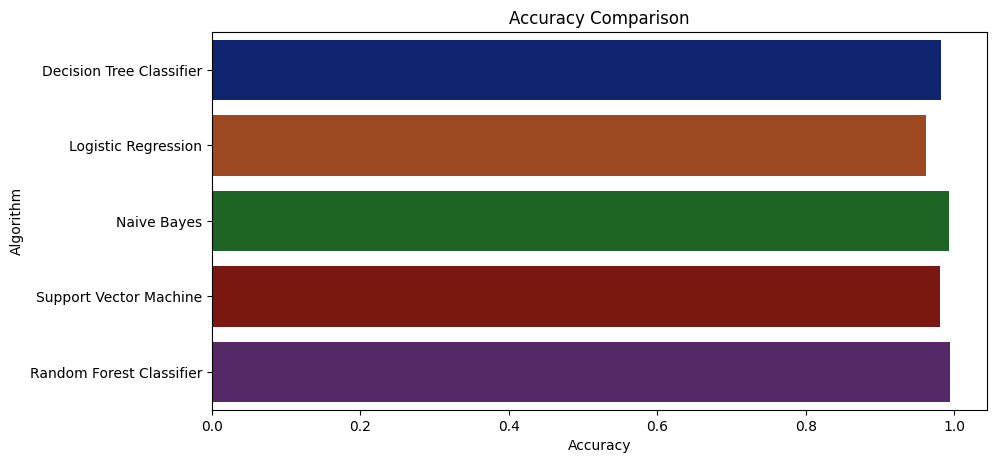

In [48]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [49]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree Classifier --> 0.9818181818181818
Logistic Regression --> 0.9621212121212122
Naive Bayes --> 0.9924242424242424
Support Vector Machine --> 0.9803030303030303
Random Forest Classifier --> 0.9939393939393939


## Making a Prediction

In [50]:
data = np.array([[79, 20, 32, 23.4120, 58, 7.2, 130.19]])
prediction = rfc.predict(data)
print(prediction)

['coffee']


In [51]:
data = np.array([[60, 44, 23, 24.79, 70.54, 5.54, 76.45]])
prediction = rfc.predict(data)
print(prediction)

['maize']


In [52]:
data = np.array([[13, 60, 25, 17.23, 20.323, 5.68, 128.25]])
prediction = rfc.predict(data)
print(prediction)

['kidneybeans']


In [53]:
#  export rfc as pickle file
import pickle
pickle.dump(rfc, open('rfc.pkl','wb'))